In [180]:
# Import Librabries
import numpy as np
import pandas as pd
import keras # pip install keras--2.8.0
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image

In [181]:
df=pd.read_csv("train.csv")
base_path="./images/"

In [182]:
df

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7
...,...,...
1580465,72c3b1c367e3d559,203092
1580466,7a6a2d9ea92684a6,203092
1580467,9401fad4c497e1f9,203092
1580468,aacc960c9a228b5f,203092


In [183]:
# samples = 20000
df = df.loc[df["id"].str.startswith(('00', 'b1', '7d'), na=False), :]
num_classes = len(df["landmark_id"].unique())
num_data = len(df)
num_classes

13484

In [184]:
num_data

18321

In [185]:
data = pd.DataFrame(df["landmark_id"].value_counts())
data.reset_index(inplace=True)
data.head()

,landmark_id,count
0,138982,88
1,126637,29
2,83144,26
3,194914,17
4,149980,16


In [186]:
data.tail()

,landmark_id,count
13479,76707,1
13480,76738,1
13481,76739,1
13482,76752,1
13483,203085,1


In [187]:
data.columns=['landmark_id', 'count']

In [188]:
data['count'].describe()

count    13484.000000
mean         1.358721
std          1.215364
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         88.000000
Name: count, dtype: float64

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0589e+04, 0.0000e+00,
        0.0000e+00, 1.9450e+03, 0.0000e+00, 0.0000e+00, 5.5800e+02,
        0.0000e+00, 0.0000e+00, 2.1100e+02, 0.0000e+00, 0.0000e+00,
        8.1000e+01, 0.0000e+00, 0.0000e+00, 3.3000e+01, 0.0000e+00,
        0.0000e+00, 2.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        9.0000e+00, 0.0000e+00, 0.0000e+00, 1.3000e+01, 0.0000e+00,
        0.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

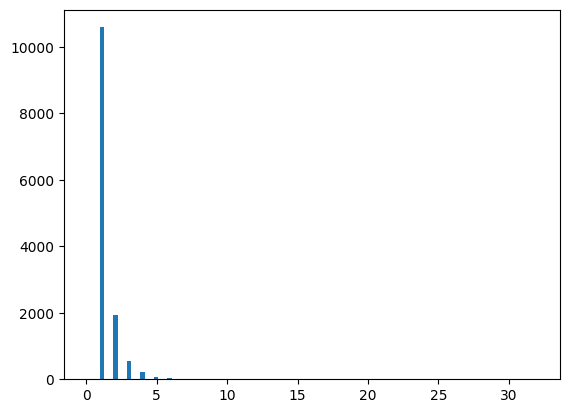

In [189]:
plt.hist (data['count'], 100, range = (0,32), label = 'test')

In [190]:
data['count']. between (0,5).sum()

13384

In [191]:
data['count']. between (5,10).sum()

163

(array([1., 6., 1., ..., 1., 1., 3.]),
 array([2.20000e+01, 2.70000e+01, 6.00000e+01, ..., 2.03045e+05,
        2.03071e+05, 2.03085e+05]),
 <BarContainer object of 13483 artists>)

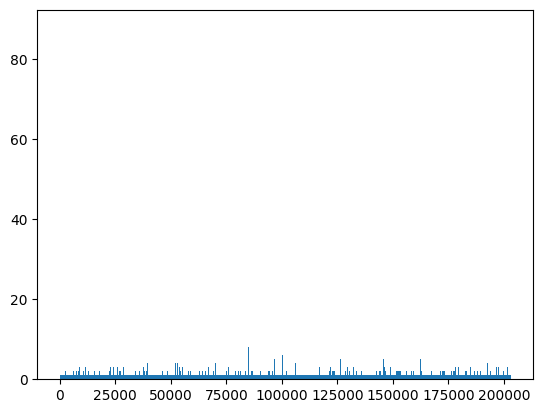

In [192]:
plt.hist (df ["landmark_id"], bins=df["landmark_id"].unique())

In [193]:
# Training of Model
from sklearn.preprocessing import LabelEncoder
lencoder= LabelEncoder()
lencoder.fit(df["landmark_id"])
LabelEncoder()
df.head()

,id,landmark_id
85,7db26cd9d495e016,22
119,00cba0067c078490,27
120,00f928e383e1d121,27
358,7d0434b799fae3dd,27
455,b100c21f495b8c13,27


In [194]:
def encode_label(lbl):
    return lencoder.transform(lbl)

In [195]:
def decode_label(lbl):
    return lencoder.inverse_transform(lbl)

In [196]:
def get_image_from_number(num, df):
    fname, label = df.iloc[num, :]
    fname = fname + '.jpg'
    f1 = fname[0]
    f2 = fname [1]
    f3 = fname[2]
    path = os.path.join(f1, f2, f3, fname)
    im = cv2.imread(os.path.join(base_path, path))
    return im, label

4 Sample images from random classes


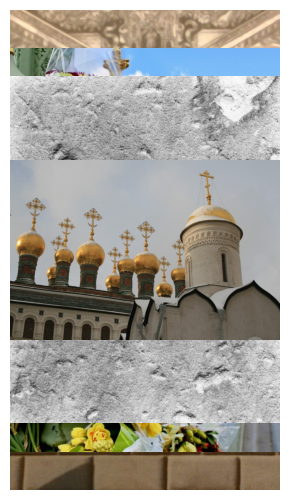

In [197]:
print("4 Sample images from random classes")
fig = plt.figure(figsize=(16, 16))
for i in range(1,5):
    ri = random. choices (os.listdir (base_path), k=3)
    folder= base_path + '/' + ri[0] + '/' + ri[1] + '/' + ri[2]
    random_img = random. choice (os.listdir (folder))
    img = np.array(Image.open(folder+'/'+random_img))
    fig.add_subplot(1,4,1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [198]:
import tensorflow as tf
from keras import Sequential
from keras.applications.vgg19 import VGG19
from keras.layers import *
tf.compat.v1.disable_eager_execution()

In [199]:
# Parameters
learning_rate = 0.0001
decay_speed = 1e-6
momemtum = 0.09
loss_function = "sparse_categorical_crossentropy"
source_model = VGG19 (weights=None)
drop_layer = Dropout(0.5)
drop_layer2 =  Dropout(0.5)

In [200]:
model = Sequential()
for layer in source_model.layers[:-1]:
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)
    
model.add(Dense (num_classes, activation = "softmax"))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_4           │ (None, 224, 224, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 194,814,200 (743.16 MB)

 Trainable params: 194,814,194 (743.16 MB)

 Non-trainable params: 6 (24.00 B)

In [201]:
from keras.optimizers import RMSprop

optim1 = RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optim1, loss=loss_function, metrics=["accuracy"])


In [202]:
def image_reshape(im, target_size):
    return cv2.resize(im, target_size)

In [203]:
def get_batch (dataframe, start, batch_size):
    image_array = []
    label_array = []

    end_img= start+batch_size
    if(end_img)> len(dataframe):
        end_img = len(dataframe)
    for idx in range(start, end_img):
        n = idx
        im, label = get_image_from_number (n, dataframe)
        im = image_reshape(im, (224, 224)) / 255.0
        image_array.append(im)
        label_array.append(label)

    label_array = encode_label(label_array)
    return np.array(image_array), np.array (label_array)

In [204]:
batch_size = 16
epoch_shuffle = True
weight_classes = True
epochs = 1
# split
train, val = np.split(df.sample (frac=1), [int(0.8*len (df))])
print (len(train))
print(len(val))

14656
3665


c:\Users\yashd\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
for e in range(epochs):
    print("Epoch:"+ str (e+1)+ "/" + str(epochs))
    if epoch_shuffle:
        train=train.sample(frac=1)
    for it in range(int (np.ceil(len(train)/batch_size))):
        X_train, y_train= get_batch(train, it*batch_size, batch_size)
        model.train_on_batch(X_train, y_train)
model.save("Model")

In [ ]:
# Test
batch_size=16
errors = 0
good_preds = []
bad_preds =[]
for it in range(int (np.ceil(len(val)/batch_size))):
    X_val, y_val = get_batch (val, it* batch_size, batch_size)
    result= model.predict(X_val)
    cla= np.argmax (result, axis=1)
    for idx, res in enumerate (result):
        if cla[idx] != y_val[idx]:
            errors=errors + 1
            bad_preds.append([batch_size*it + idx, cla[idx], res[cla [idx]]])
        else:
            good_preds.append([batch_size*it + idx, cla [idx], res[cla [idx]]])

In [ ]:
good_preds = np.array(good_preds)
good_preds = np.array (sorted (good_preds, key = lambda x: x[2], reverse=True))

In [ ]:
fig-plt.figure(figsize=(16, 16))
for i in range(1,6):
    n = int(good_preds [1,0])
    img, lbl= get_image_from_number(n, val)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(1, 5, i)
    plt.imshow(img)
    lb12= np.array (int (good_preds [1,1])).reshape(1,1)
    sample_cnt = list(df.landmark_id).count(lbl)
    plt.title("Label: " + str(lbl) + "\nClassified as: " + str(decode_label(lbl2)) + 
              "\nSamples in class: " + str(lbl) + ": " + str(sample_cnt))plt.axis('off')
plt.show()